In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train.shape, test.shape

((891, 12), (418, 11))

In [3]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

In [4]:
import seaborn as sns

anscombe = sns.load_dataset('anscombe')

In [5]:
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [6]:
anscombe.dataset.value_counts()

III    11
II     11
I      11
IV     11
Name: dataset, dtype: int64

In [7]:
import matplotlib.pyplot as plt

(array([ 1.,  3.,  6.,  7.,  9., 11.,  3.,  1.,  1.,  2.]),
 array([ 3.1  ,  4.064,  5.028,  5.992,  6.956,  7.92 ,  8.884,  9.848,
        10.812, 11.776, 12.74 ]),
 <BarContainer object of 10 artists>)

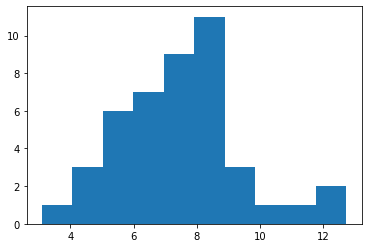

In [8]:
plt.hist(anscombe['y'])

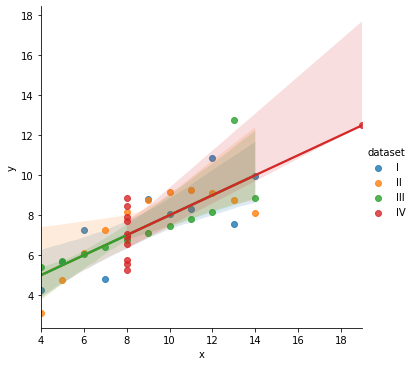

In [9]:
anscomb_plot = sns.lmplot(x='x', y='y', data=anscombe, hue='dataset')

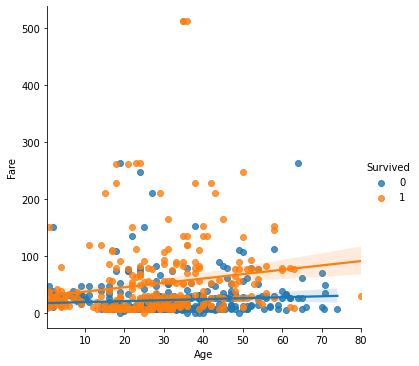

In [10]:
### 실습 1-4 Age, Fare lmplot을 그려보자, 생존자(생존, 사망) 구분

sns.lmplot(x='Age', y='Fare', data=train, hue='Survived')

# outlier 발견

In [11]:
train[train['Fare']>500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

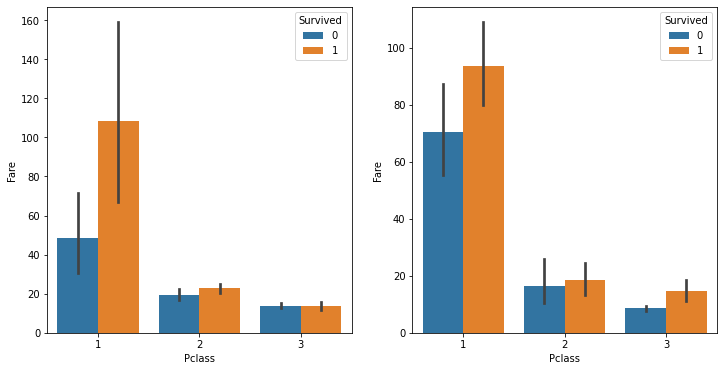

In [12]:
Cabin_na = train[train['Cabin'].isnull()]
Cabin_notna = train[train['Cabin'].notna()]

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=Cabin_na)

plt.subplot(1,2,2)
sns.barplot(x='Pclass', y='Fare', hue='Survived', data=Cabin_notna)

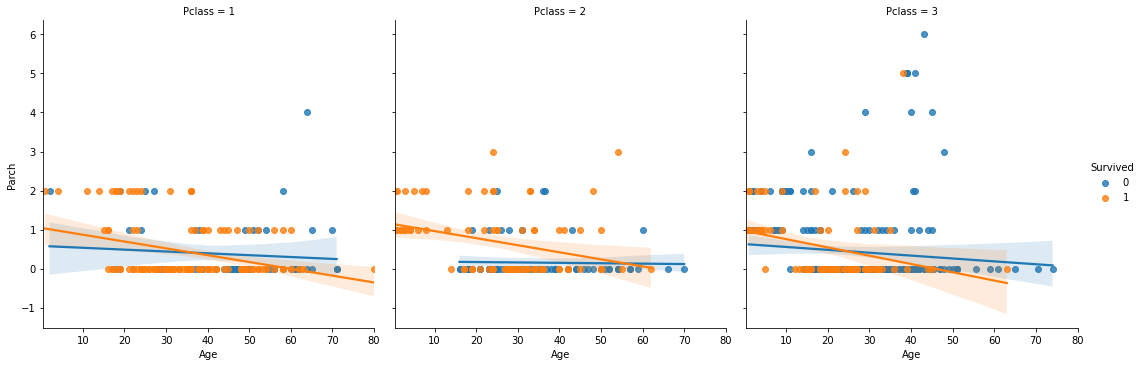

In [13]:
sns.lmplot(x='Age', y='Parch', data=train,
                           hue='Survived',
                           col='Pclass', col_wrap=3)   # col_wrap = 한 행에 몇 개까지 출력?

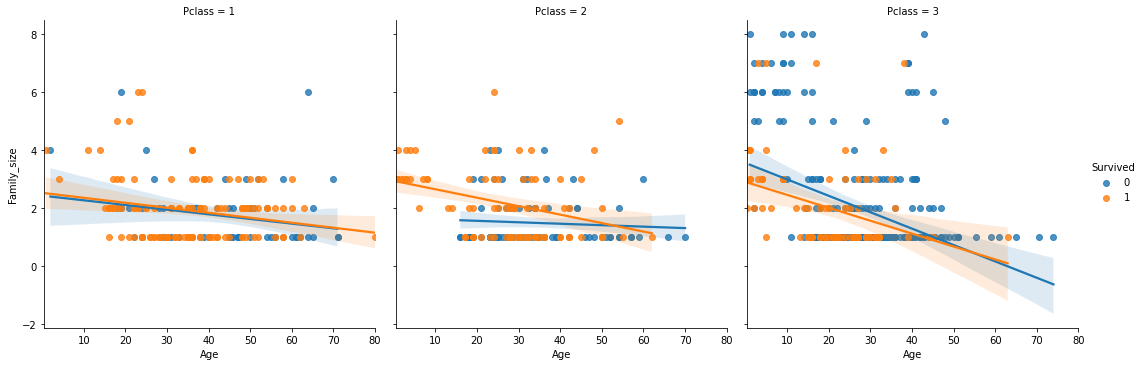

In [14]:
train['Family_size'] = train['SibSp'] + train['Parch'] + 1

sns.lmplot(x='Age', y='Family_size', data=train, hue='Survived', 
          col='Pclass', col_wrap=3)

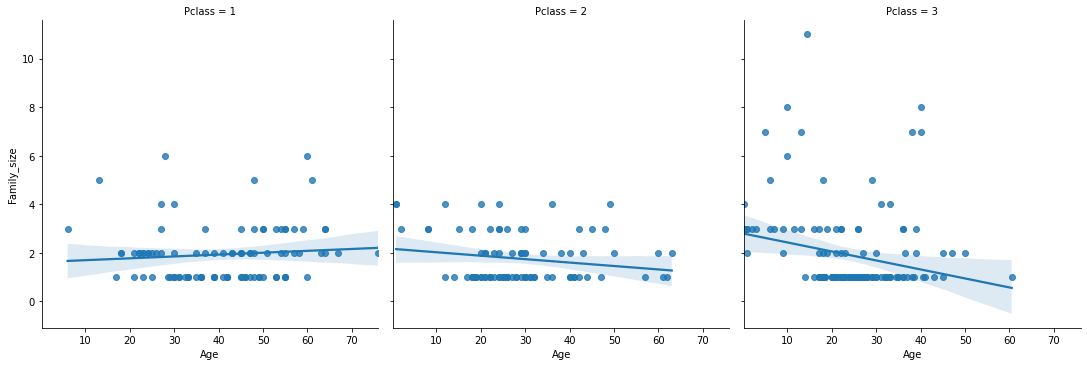

In [15]:
test['Family_size'] = test['SibSp'] + test['Parch'] + 1

sns.lmplot(x='Age', y='Family_size', data=test, 
          col='Pclass', col_wrap=3)

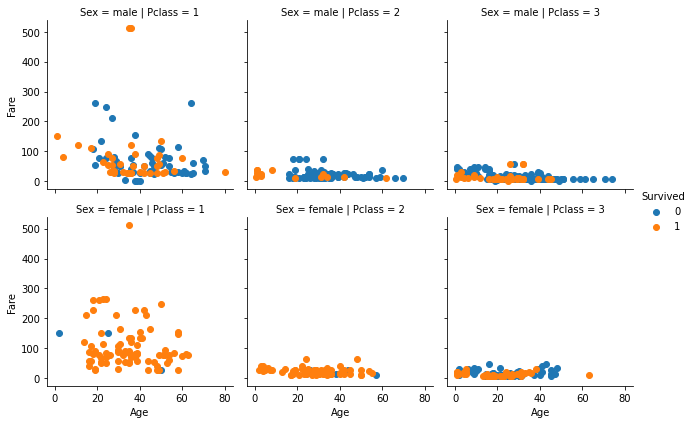

In [16]:
facet = sns.FacetGrid(train, col='Pclass', row='Sex', hue='Survived')
facet = facet.map(plt.scatter, 'Age', 'Fare')
facet = facet.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


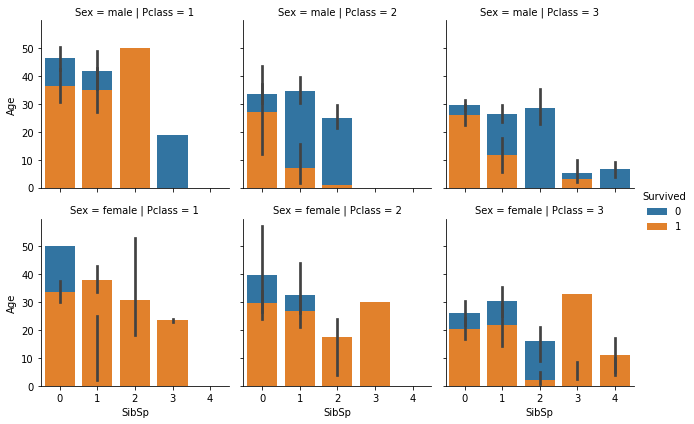

In [17]:
facet = sns.FacetGrid(train, col='Pclass', row='Sex', hue='Survived')
facet = facet.map(sns.barplot, 'SibSp', 'Age')
facet = facet.add_legend()

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


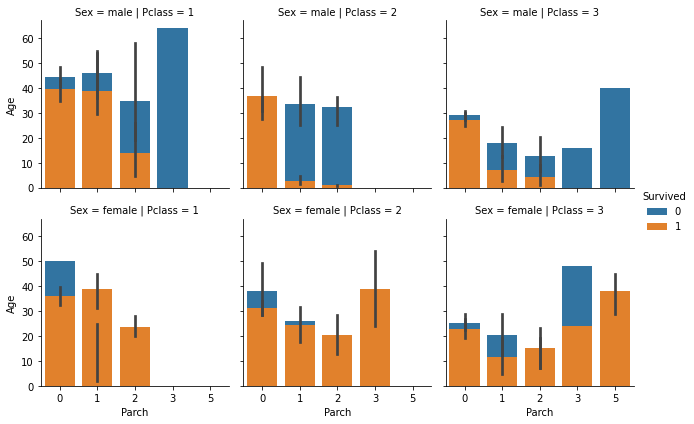

In [18]:
facet = sns.FacetGrid(train, col='Pclass', row='Sex', hue='Survived')
facet = facet.map(sns.barplot, 'Parch', 'Age')
facet = facet.add_legend()

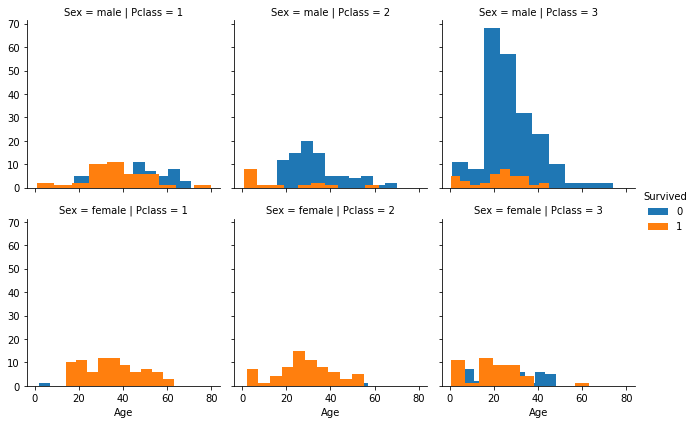

In [19]:
facet = sns.FacetGrid(train, col='Pclass', row='Sex', hue='Survived')
facet = facet.map(plt.hist, 'Age')
facet = facet.add_legend()

### 결측치 처리

In [20]:
all_df = pd.concat([train, test], join='inner', ignore_index=True)  # join : 공통된 열만 연결

# Survived 사라짐
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
 11  Family_size  1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [21]:
all_df['Fare'] = all_df['Fare'].fillna(all_df['Fare'].mean())
all_df['Embarked'] = all_df['Embarked'].fillna('S')

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   object 
 11  Family_size  1309 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [22]:
all_df['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [23]:
## 실습 3-2 Name_title, Cabin_bool

all_df['Cabin_bool'] = all_df['Cabin'].notna().map({True:1, False:0})

In [24]:
all_df['Title'] = all_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)

all_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [25]:
all_df['Title'] = all_df['Title'].replace(['Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major',
                                           'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 
                                           'Countess', 'Jonkheer', 'Dona'], 'Rare')

all_df['Title'] = all_df['Title'].replace('Mme', "Mrs")
all_df['Title'] = all_df['Title'].replace('Mlle', "Miss")
all_df['Title'] = all_df['Title'].replace('Ms', "Miss")

In [26]:
all_df['Fare_code'] = pd.qcut(all_df['Fare'], 5, labels=False)
all_df['Fare_code']

0       0
1       4
2       1
3       4
4       1
       ..
1304    1
1305    4
1306    0
1307    1
1308    3
Name: Fare_code, Length: 1309, dtype: int64

In [27]:
all_df['Title'].unique(), all_df['Embarked'].unique(), all_df['Sex'].unique()

(array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object),
 array(['S', 'C', 'Q'], dtype=object),
 array(['male', 'female'], dtype=object))

In [28]:
all_df['Title'] = all_df['Title'].map({'Mr':1, 'Mrs':2, 'Miss':3, 'Master':4, 'Rare':5})
all_df['Embarked'] = all_df['Embarked'].map({'S':1, 'C':2, 'Q':3})
all_df['Sex'] = all_df['Sex'].map({'male':1, 'female':2})

all_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Cabin_bool,Title,Fare_code
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,2,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2,2,1,2,4
2,3,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,3,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1,2,1,2,4
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,0,1,1


In [29]:
all_df.loc[all_df['Cabin'].isna(), 'Cabin_First'] = 'Z'
all_df.loc[all_df['Cabin'].notna(), 'Cabin_First'] = all_df['Cabin'].str.slice(0, 1)
print(all_df['Cabin_First'].value_counts())

Z    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin_First, dtype: int64


<AxesSubplot:ylabel='Cabin_First'>

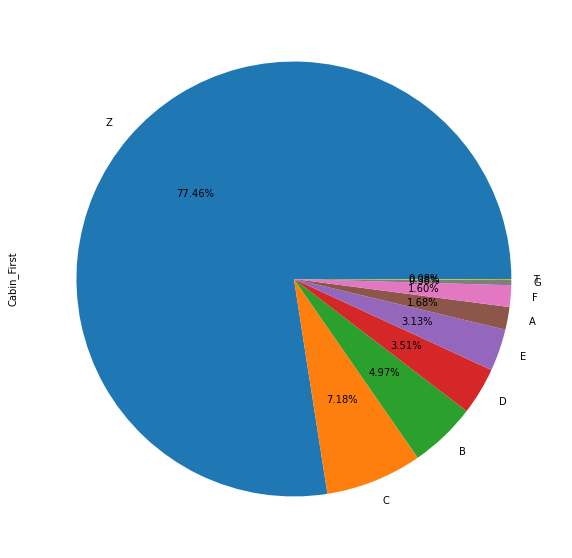

In [30]:
tmp = all_df['Cabin_First'].value_counts()
tmp.plot(kind='pie', autopct='%1.2f%%', figsize=(15,10))

In [31]:
all_df['Cabin_First'] = all_df['Cabin_First'].replace(['G','T'],"Rare")
Cabin_First_dic = {"A":0, "B":1, "C":2, "D":3, "E":4, "F":5, "Z":6}

all_df['Cabin_First'] = all_df['Cabin_First'].map(Cabin_First_dic)
all_df['Cabin_First'].value_counts()

6.0    1014
2.0      94
1.0      65
3.0      46
4.0      41
0.0      22
5.0      21
Name: Cabin_First, dtype: int64

In [32]:
all_df['Cabin_First'] = all_df['Cabin_First'].fillna('6.0')

In [33]:
mean_title = all_df.groupby('Title')['Age'].mean()

all_df.loc[(all_df['Age'].isna()) & (all_df['Title']==1), 'Age'] = mean_title[1]
all_df.loc[(all_df['Age'].isna()) & (all_df['Title']==2), 'Age'] = mean_title[2]
all_df.loc[(all_df['Age'].isna()) & (all_df['Title']==3), 'Age'] = mean_title[3]
all_df.loc[(all_df['Age'].isna()) & (all_df['Title']==4), 'Age'] = mean_title[4]
all_df.loc[(all_df['Age'].isna()) & (all_df['Title']==5), 'Age'] = mean_title[5]

all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   int64  
 4   Age          1309 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1309 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1309 non-null   int64  
 11  Family_size  1309 non-null   int64  
 12  Cabin_bool   1309 non-null   int64  
 13  Title        1309 non-null   int64  
 14  Fare_code    1309 non-null   int64  
 15  Cabin_First  1309 non-null   object 
dtypes: float64(2), int64(10), object(4)
memory usage: 163.8+ KB


In [34]:
all_df['Age_code'] = pd.qcut(all_df['Age'], 5, labels=False)
all_df.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Cabin_bool,Title,Fare_code,Cabin_First,Age_code
0,1,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,1,2,0,1,0,6.0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,2,2,1,2,4,2.0,3
2,3,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,3,1,6.0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,1,2,1,2,4,2.0,3
4,5,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,1,1,0,1,1,6.0,3
5,6,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,3,1,0,1,1,6.0,2
6,7,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,1,1,1,1,4,4.0,4
7,8,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,1,5,0,4,2,6.0,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,1,3,0,2,2,6.0,2
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,2,2,0,2,3,6.0,0


In [35]:
ticket = []

for i in all_df['Ticket']:
    temp = i.split(' ')
    if len(temp) == 2:
        ticket.append(temp[0])
    else:
        ticket.append('')
        
ticket = pd.Series(ticket)
ticket.unique()

array(['A/5', 'PC', 'STON/O2.', '', 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON', 'SC/A.3', 'STON/OQ.', 'SC/A4', 'AQ/4', 'LP', 'AQ/3.'],
      dtype=object)

In [36]:
for idx, one in enumerate(ticket):
    if one == 'A/5' or one == 'A/5.' or one == 'A./5.' or one == 'A.5.': ticket[idx] = 1 
    elif one == 'PC': ticket[idx] = 2 
    elif one == 'C.A.' or one == 'CA' or one == 'CA.': ticket[idx] = 3 
    elif one == 'SC/Paris' or one == 'SC/PARIS' or one == 'S.C./PARIS': ticket[idx] = 4 
    elif one == 'A/4.' or one == 'A4.' or one == 'A/4': ticket[idx] = 5 
    elif one == 'W./C.' or one == 'W/C': ticket[idx] = 6 
    elif one == 'SOTON/OQ' or one == 'SOTON/O.Q.' or one == 'SOTON/O2': ticket[idx] = 7 
    elif one == 'C': ticket[idx] = 8 
    elif one == 'F.C.C.': ticket[idx] = 9 
    elif one == 'S.O./P.P.': ticket[idx] = 10 
    else: ticket[idx] = 0 

In [37]:
ticket = pd.Series(ticket)
all_df['Ticket_code'] = ticket

all_df['Ticket_code'].value_counts()

0     1026
2       92
3       68
1       28
7       27
4       19
6       15
5       10
9        9
8        8
10       7
Name: Ticket_code, dtype: int64

In [38]:
## 891, 418
train_1 = all_df.iloc[:891]
test_1 = all_df.iloc[891:]

train_1.shape, test_1.shape

((891, 18), (418, 18))

In [39]:
train_1['Survived'] = train['Survived']
train_1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Cabin_bool,Title,Fare_code,Cabin_First,Age_code,Ticket_code,Survived
0,1,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1,2,0,1,0,6.0,1,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2,2,1,2,4,2.0,3,2,1
2,3,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,1,0,3,1,6.0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1,2,1,2,4,2.0,3,0,1
4,5,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1,1,0,1,1,6.0,3,0,0


In [40]:
sel = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare_code', 'Age_code', 'Embarked', 'Ticket_code', 'Title', 'Cabin_First']

X_train = train_1[sel]
X_test = test_1[sel]

y_train = train_1['Survived']

In [41]:
X_train.isnull().sum(), y_train.isnull().sum()

(Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare_code      0
 Age_code       0
 Embarked       0
 Ticket_code    0
 Title          0
 Cabin_First    0
 dtype: int64,
 0)

In [42]:
from sklearn.ensemble import RandomForestClassifier

dc_tree = RandomForestClassifier()
dc_tree.fit(X_train, y_train)

pred = dc_tree.predict(X_test)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,

In [43]:
from sklearn.metrics import accuracy_score

sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
# sub_1 = sub.copy()

sub['Survived'] = pred
# accuracy_score(sub['Survived'], pred)


sub.to_csv('decision_second_model.csv', index=False)

In [44]:
sub['Survived']

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64